In [27]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')

import plottingsystem as pts
cyclobutadiene = """  C    0.7322530   -0.6646198    0.0000000
  C    0.7322530    0.6646198    0.0000000
  C   -0.7322530    0.6646198   -0.0000000
  C   -0.7322530   -0.6646198   -0.0000000
  H    1.5215298   -1.4088346    0.0000000
  H    1.5215298    1.4088346    0.0000000
  H   -1.5215298    1.4088346   -0.0000000
  H   -1.5215298   -1.4088346   -0.0000000
  """
extra_bounds = [(0,3)]
carbon_coordinates  = pts.taking_carbon_coordinates(cyclobutadiene)
print(carbon_coordinates)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)
benzene_molecule_with_H = gto.M(atom=cyclobutadiene, basis='sto-3g')#'ccpvdz''sto-6g'

pz_indices = [i for i, label in enumerate(benzene_molecule_with_H.ao_labels()) if 'C 2pz' in label]
print(pz_indices)
uhf = scf.UHF(benzene_molecule_with_H)
rhf = scf.RHF(benzene_molecule_with_H)
uhf_energy = uhf.kernel()
rhf_energy = rhf.kernel()




[[ 0.732253  -0.6646198  0.       ]
 [ 0.732253   0.6646198  0.       ]
 [-0.732253   0.6646198 -0.       ]
 [-0.732253  -0.6646198 -0.       ]]
[[ 0.732253  -0.6646198]
 [ 0.732253   0.6646198]
 [-0.732253   0.6646198]
 [-0.732253  -0.6646198]]
[4, 9, 14, 19]
converged SCF energy = -151.727655705301  <S^2> = 6.908607e-11  2S+1 = 1
converged SCF energy = -151.727655705318


In [28]:
umo_coeff = uhf.mo_coeff[0].round(6)
rmo_coeff = rhf.mo_coeff.round(6)

print(rmo_coeff)
print(rmo_coeff[pz_indices][:,[11,13,14,15]])
print(rhf.mo_energy[[11,13,14,15]])
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T

umo_coeff = normaliseer(umo_coeff)
rmo_coeff = normaliseer(rmo_coeff)


[[-4.95955e-01  4.96459e-01  4.95784e-01 -4.96179e-01 -1.27081e-01
  -1.20283e-01 -1.10809e-01 -2.56260e-02 -8.16490e-02 -2.50000e-05
  -2.66910e-02 -0.00000e+00 -3.16500e-02 -0.00000e+00 -0.00000e+00
   0.00000e+00  1.07163e-01  6.46320e-02 -1.27255e-01  1.05101e-01
  -1.86200e-02  3.97410e-02 -5.10450e-02 -9.24520e-02]
 [-1.71750e-02  1.11800e-02  2.55920e-02 -1.86910e-02  2.95321e-01
   3.49540e-01  3.39924e-01  1.09709e-01  2.52999e-01  1.92810e-02
   8.96220e-02 -0.00000e+00  1.37803e-01  0.00000e+00  0.00000e+00
  -0.00000e+00 -6.45458e-01 -4.42545e-01  7.65282e-01 -6.96935e-01
   1.56576e-01 -2.93720e-01  3.85343e-01  7.82244e-01]
 [ 3.38900e-03  1.16900e-03 -2.76100e-03 -1.53600e-03 -8.11820e-02
   1.05461e-01 -6.47710e-02  2.13087e-01  1.33578e-01 -2.75902e-01
  -7.38690e-02  0.00000e+00 -3.72974e-01  0.00000e+00 -0.00000e+00
   0.00000e+00  4.58494e-01 -2.80363e-01 -1.13079e-01 -4.25520e-01
   5.38976e-01 -6.21327e-01 -1.32334e-01 -5.52919e-01]
 [ 8.73000e-04 -6.79000e-04  3.

In [29]:
umo_eigenvalues = uhf.mo_energy[0][[11,13,14,15]]
rmo_eigenvalues = rhf.mo_energy[[11,13,14,15]]


upz_orbitals = umo_coeff[pz_indices][:,[11,13,14,15]]
rpz_orbitals = rmo_coeff[pz_indices][:,[11,13,14,15]]


In [30]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, method):
    transposed_eigenvectors = eigenvectors.T

    # Plot de moleculaire orbitalen
    num_rows = 2
    num_cols = 2
    
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 6), dpi=400)
    
    for i in range(len(eigenvalues)):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        # Plot de ring
        _x = np.cos(2 * np.pi / number_of_atoms * np.arange(number_of_atoms))
        _y = np.sin(2 * np.pi / number_of_atoms * np.arange(number_of_atoms))
        ax.plot(_x, _y, linestyle='-', color='grey')
        ax.plot([_x[-1], _x[0]], [_y[-1], _y[0]], linestyle='-', color='grey')
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'

            size = abs(c) * 2000  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(_x[j], _y[j], s=size, marker='o', color=color, zorder=2)
            # Toon de coëfficiënt in de bol
            if c.round(6)!=0:
                ax.text(_x[j], _y[j], f'{c:.2f}', ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')
        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')

        # Breid de limieten van de plotassen uit
        ax.set_aspect('equal')
        ax.margins(0.5)

        ax.axis('off')
    # Stel het algehele plot-titel in
    plt.suptitle(f'Cyclobutadiene - {method}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


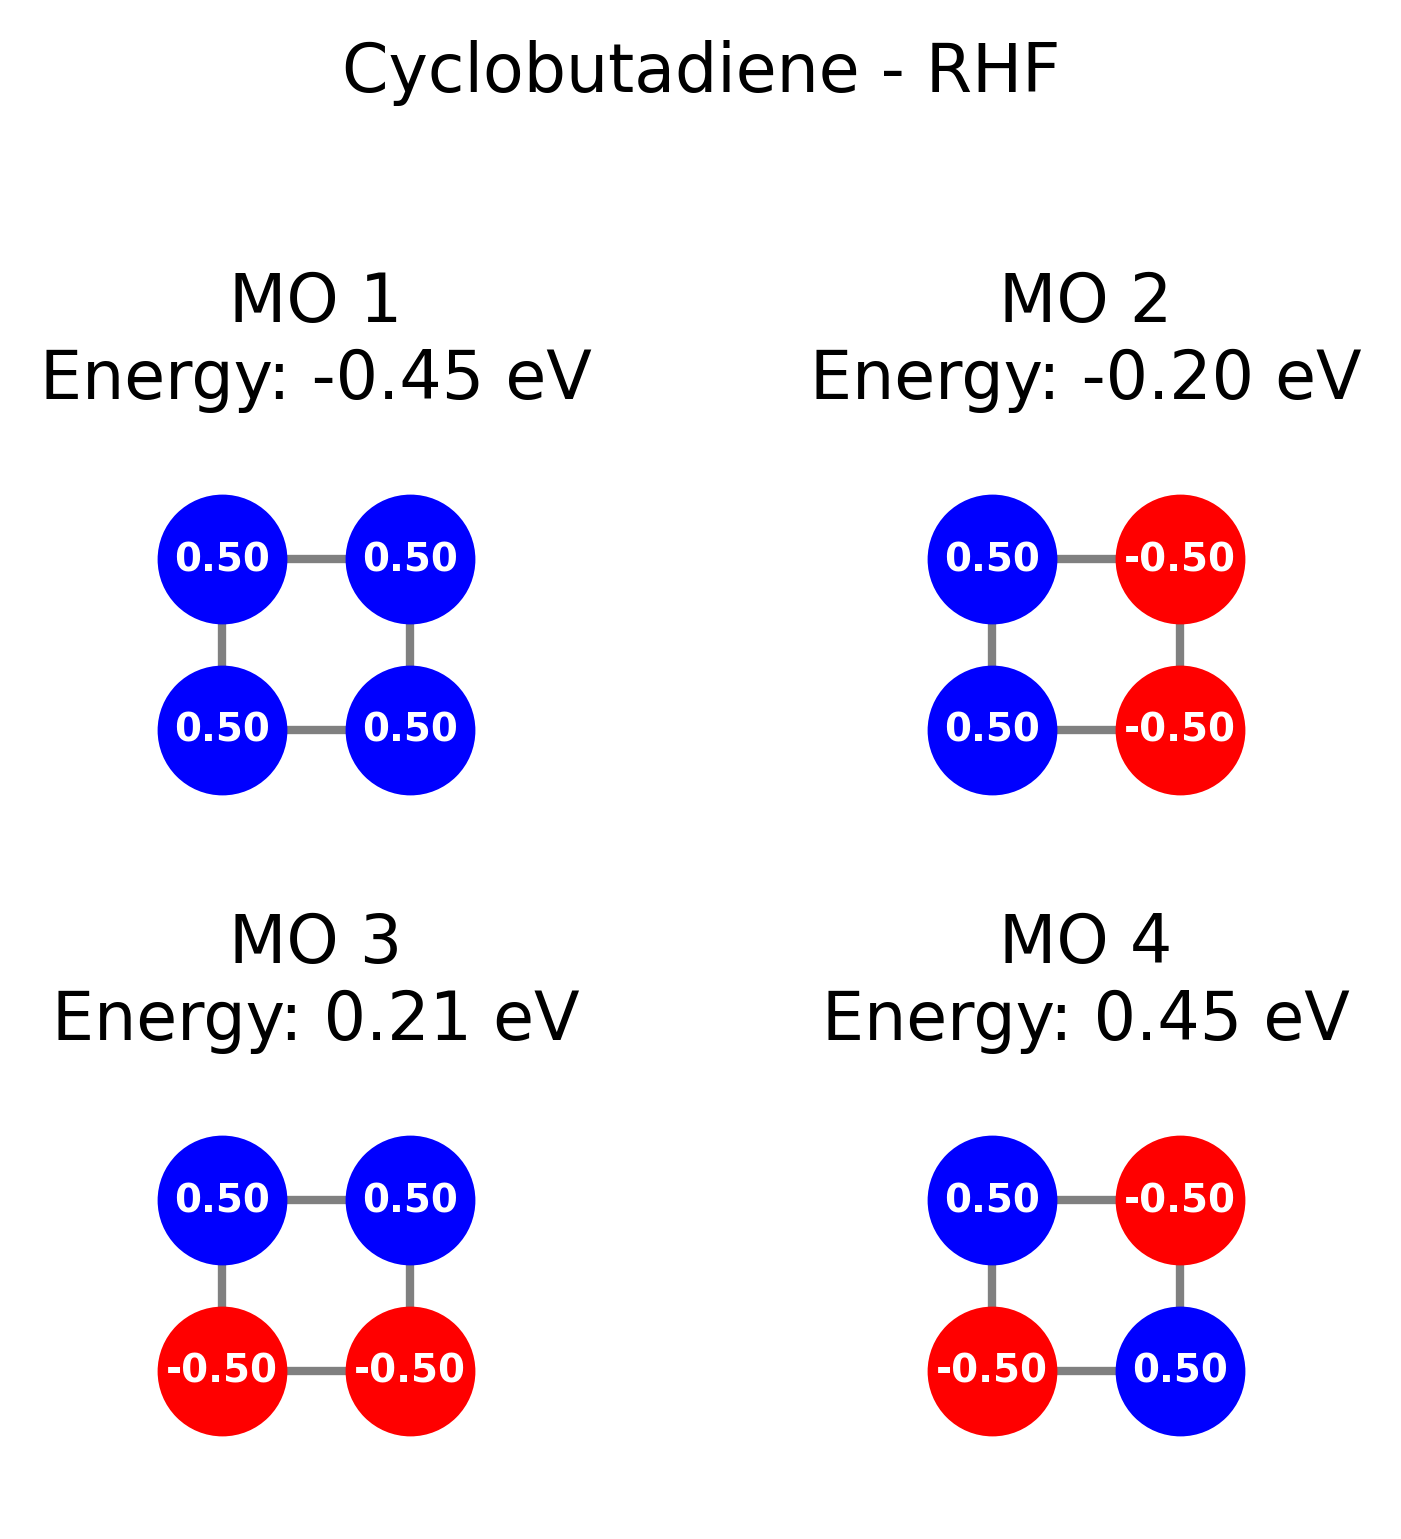

In [31]:
pts.plot_MOs(rmo_eigenvalues, rpz_orbitals, coordinates, extra_bounds, 'Cyclobutadiene', 'RHF')

In [32]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
Cyclobutadiene = huckel(4, -0.5, -1)
Cyclobutadiene.create_matrix()

huc_mat = Cyclobutadiene.huckel_matrix
print(np.linalg.eigh(huc_mat))

(array([-2.5, -0.5, -0.5,  1.5]), array([[-5.00000000e-01,  7.07106781e-01,  0.00000000e+00,
        -5.00000000e-01],
       [-5.00000000e-01,  5.43962166e-17, -7.07106781e-01,
         5.00000000e-01],
       [-5.00000000e-01, -7.07106781e-01, -5.97270439e-17,
        -5.00000000e-01],
       [-5.00000000e-01, -5.33082726e-18,  7.07106781e-01,
         5.00000000e-01]]))


In [33]:
Cyclobutadiene.solve_huckel_matrix()
eigval = Cyclobutadiene.eigenvalues
eigvec = Cyclobutadiene.eigenvectors
eigval, eigvec = np.linalg.eigh(huc_mat)
eigvec = - eigvec


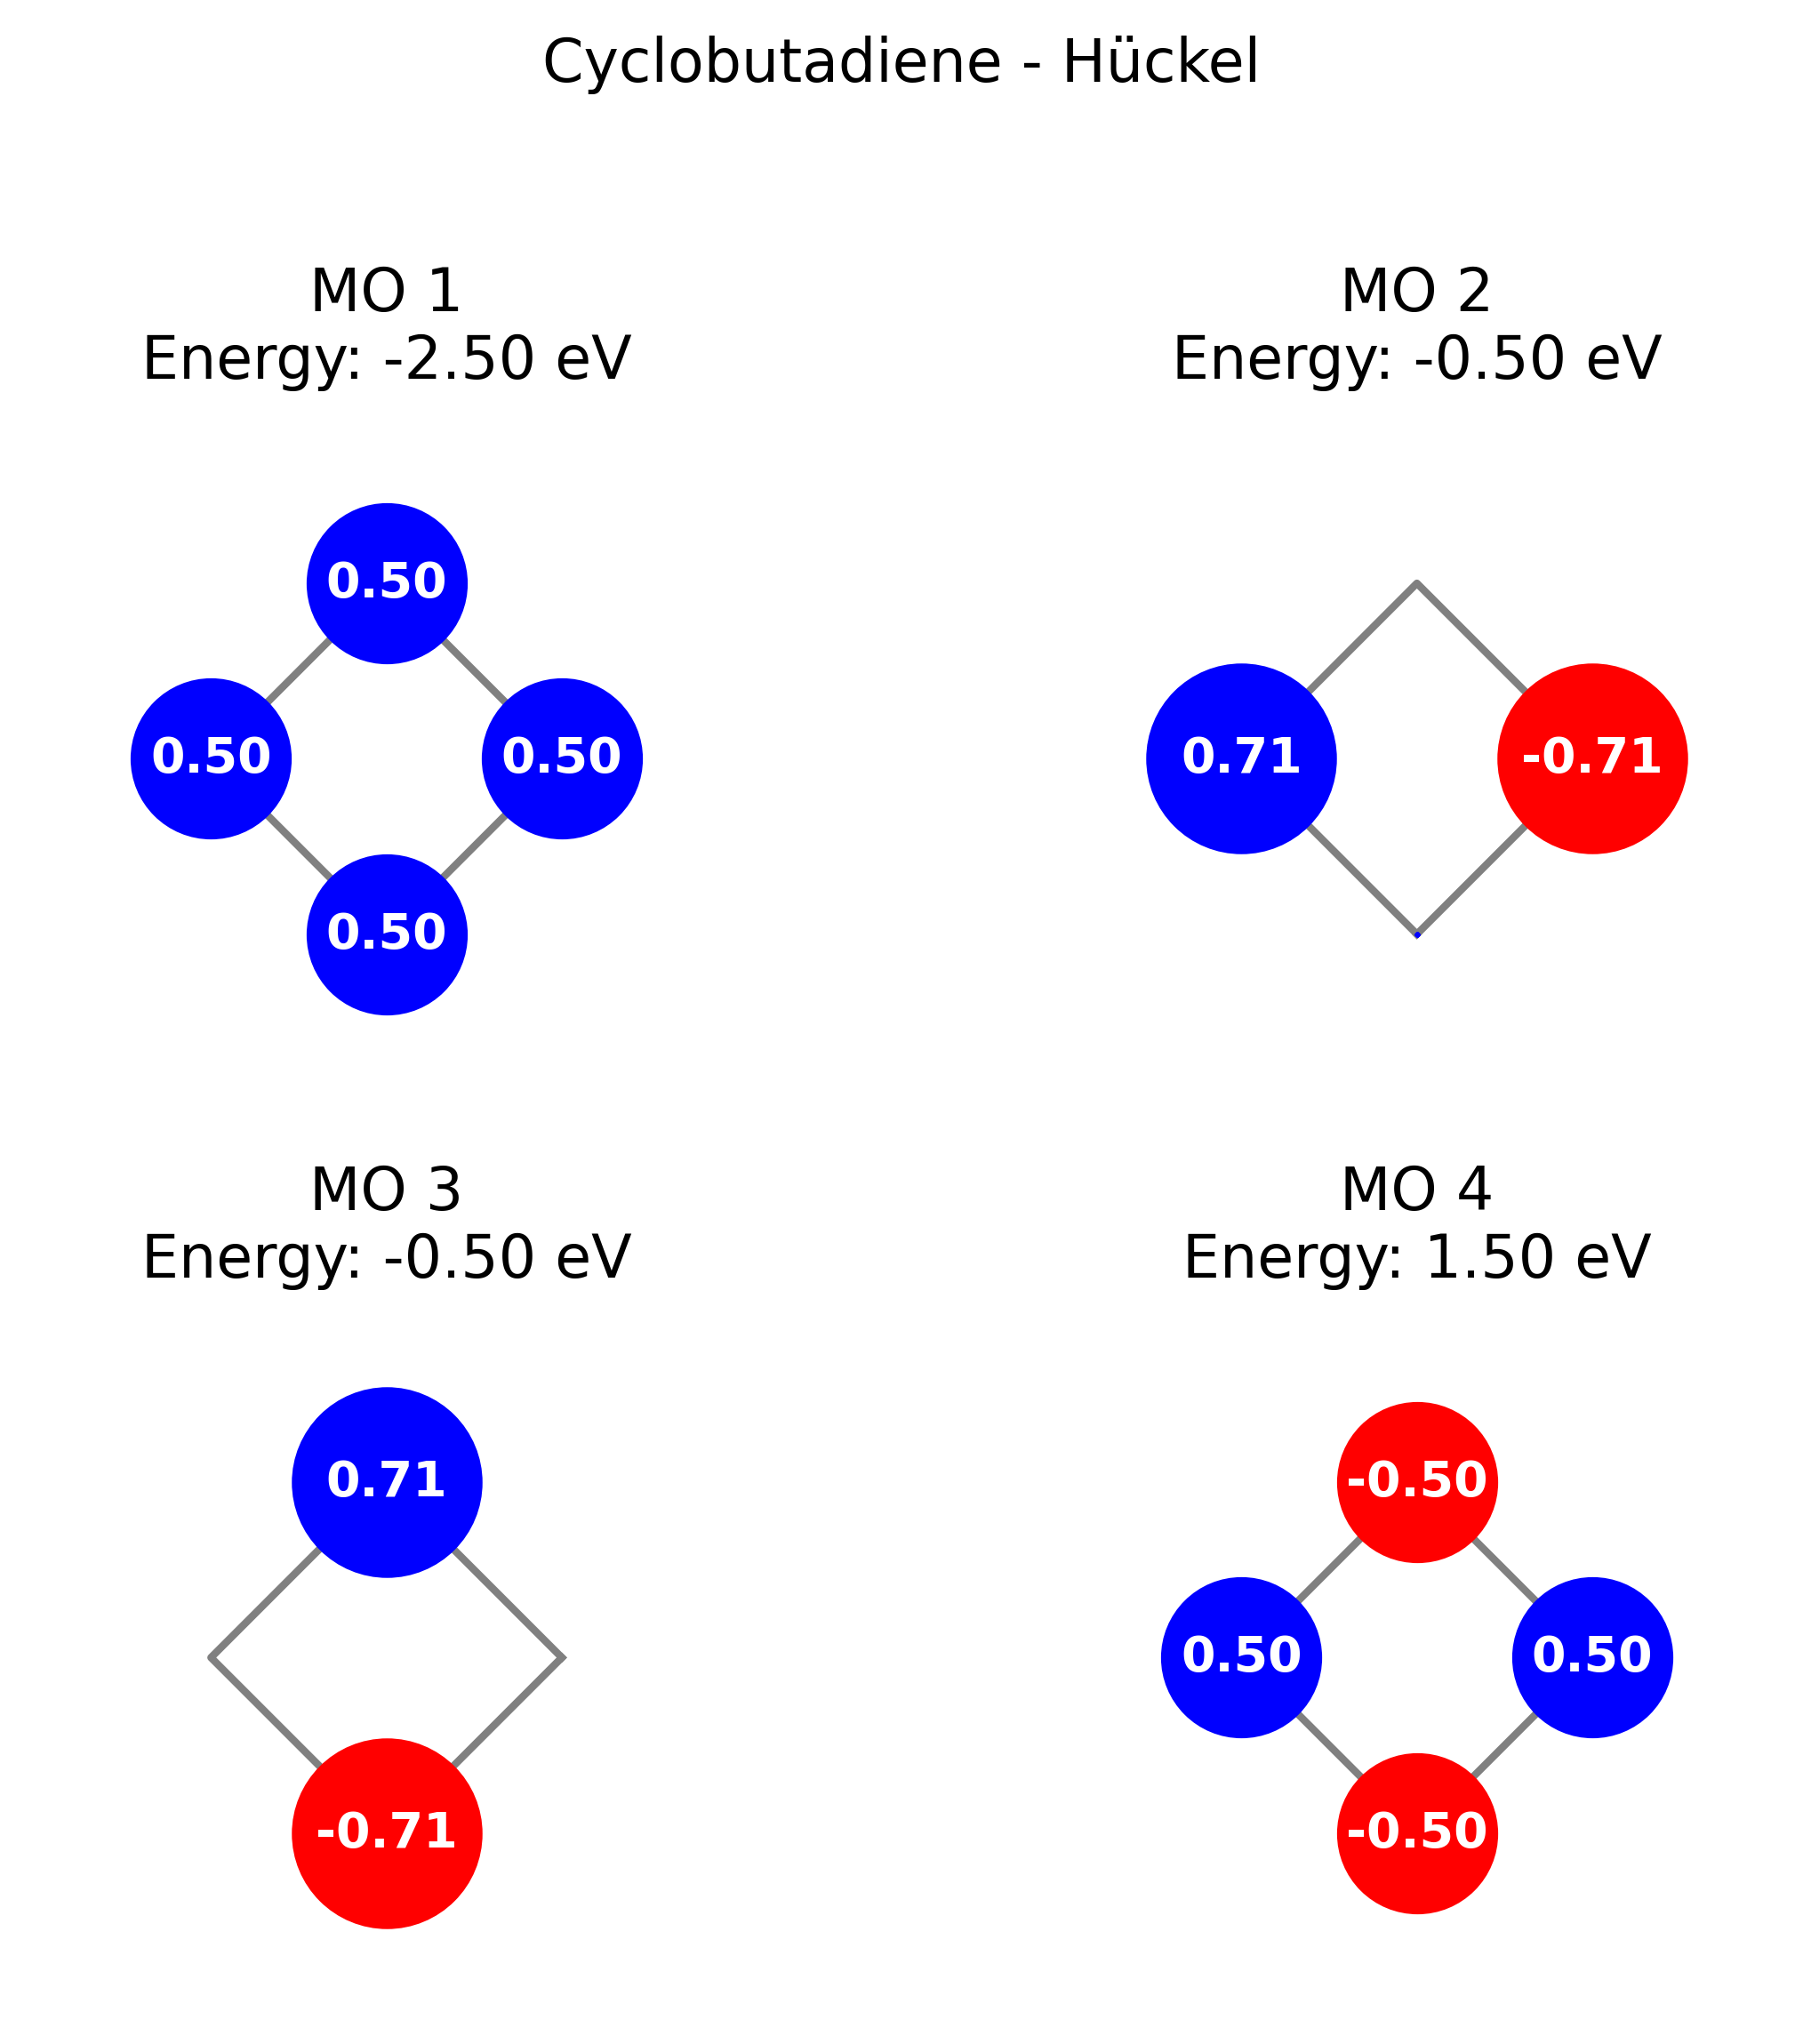

In [34]:
plotting_of_the_system(4, eigvec, eigval, 'Hückel')

In [35]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

ovp = rhf.get_ovlp()[[4, 9, 14, 19]][:, [4, 9, 14, 19]]
for i in range(4):
    ovp[i][i] = 0
    ovp[i][i-2] = 0


Cyclobutadiene = huckel(4, -0.5, -1)
Cyclobutadiene.create_matrix()
Cyclobutadiene.huckel_matrix = ovp


huc_mat_ovp = -Cyclobutadiene.huckel_matrix
print(huc_mat_ovp)

[[-0.         -0.2418438  -0.         -0.18928155]
 [-0.2418438  -0.         -0.18928155 -0.        ]
 [-0.         -0.18928155 -0.         -0.2418438 ]
 [-0.18928155 -0.         -0.2418438  -0.        ]]


In [36]:
Cyclobutadiene.solve_huckel_matrix()
eigval = Cyclobutadiene.eigenvalues
eigvec = Cyclobutadiene.eigenvectors
eigval, eigvec = np.linalg.eigh(huc_mat_ovp)
eigvec[:,0] = -eigvec[:,0]


print(eigval)
print(eigvec)

[-0.43112535 -0.05256225  0.05256225  0.43112535]
[[ 0.5  0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5  0.5]]


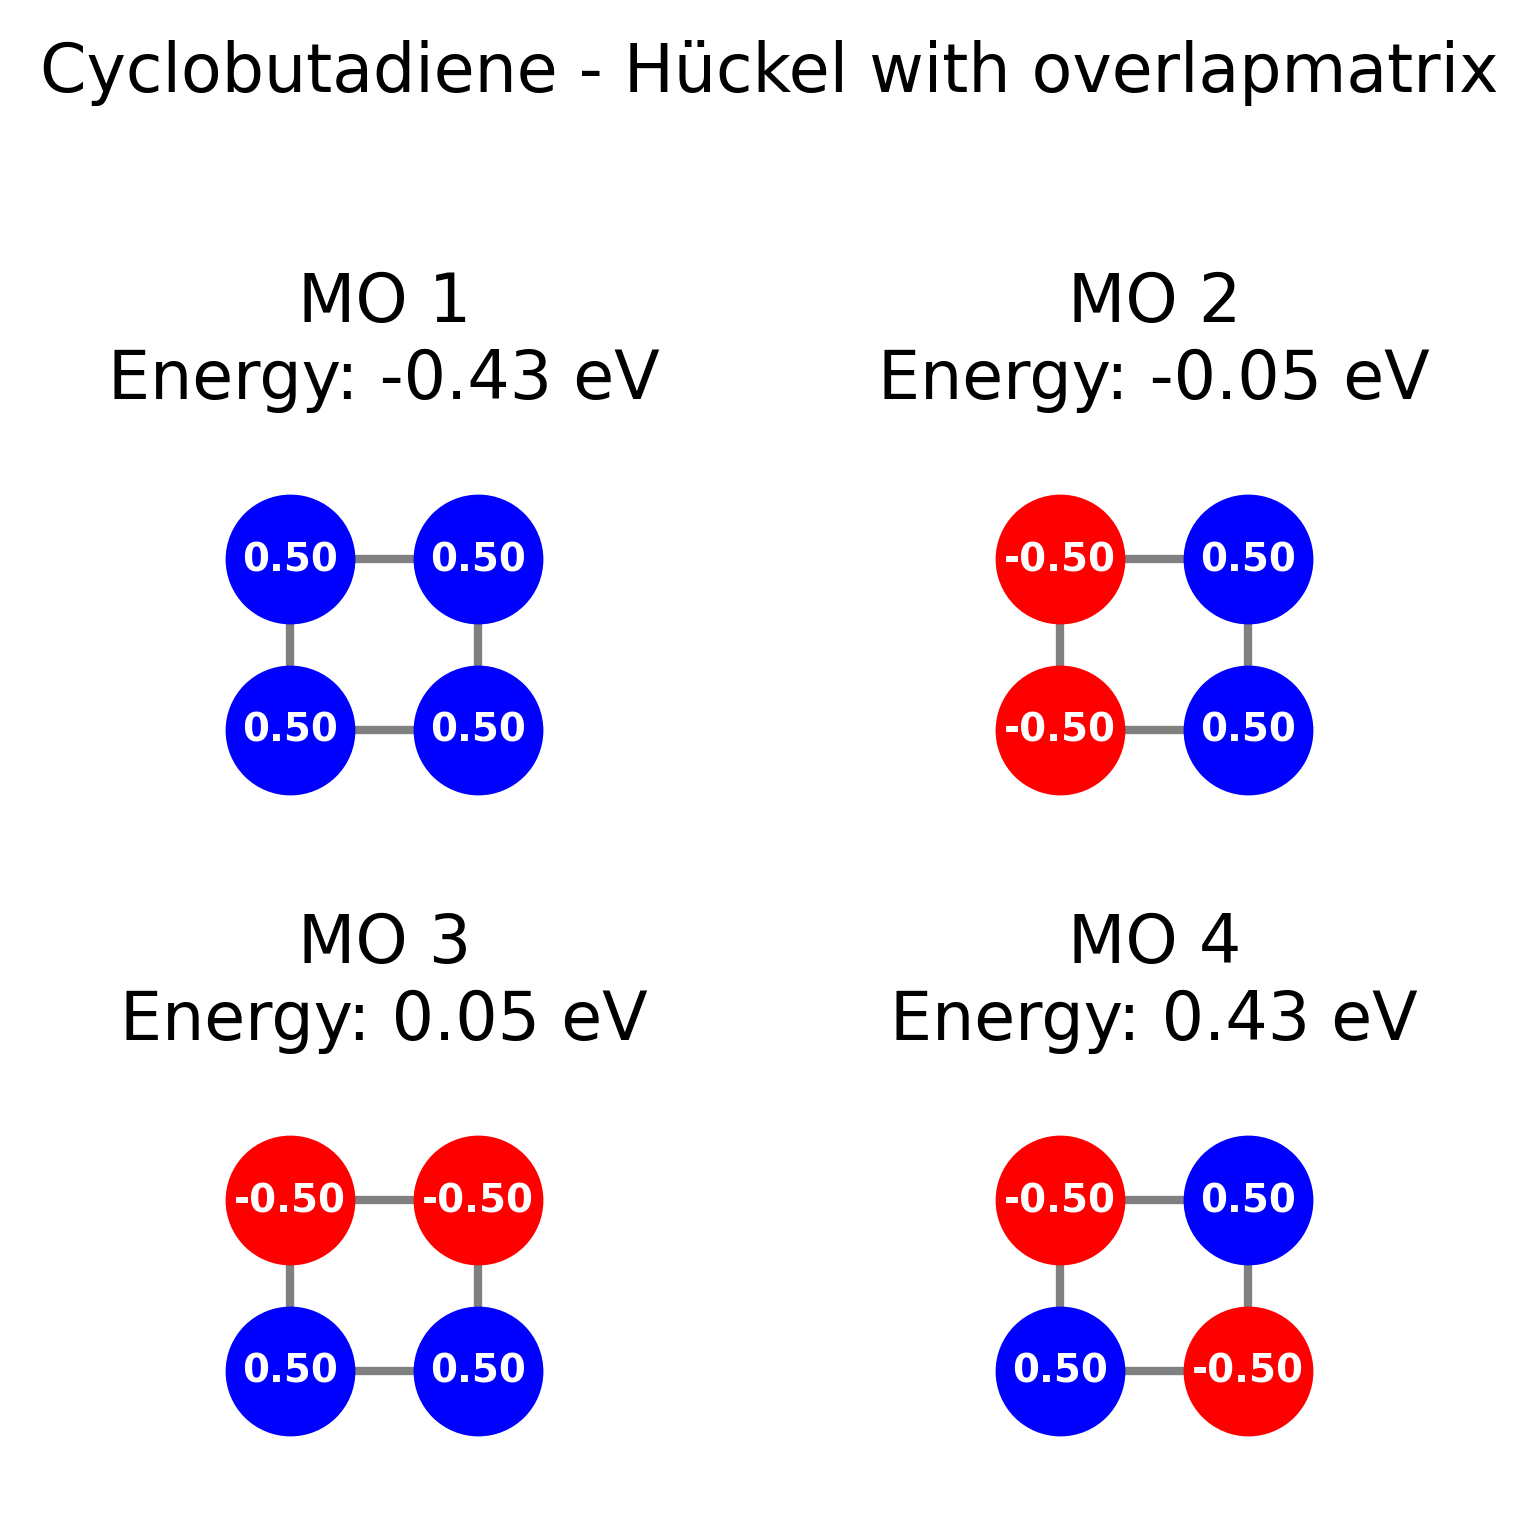

In [38]:
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'Cyclobutadiene', 'Hückel with overlapmatrix')